# EDA ON HABERMAN'S SURVIVAL DATASET

Downloaded Haberman Cancer Survival dataset from Kaggle. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

# DATA DESCRIBTION:
    

The Haberman's survival dataset contains cases from study that was conducted between 1958-1970 at university of Chicago's 
billings hospital on survival of patients undergoing breast cancer.


 ATTRIBUTES INFORMATION:
   1. AGE OF PATIENTS
   2. YEAR OF OPERATION
   3. NUMBER OF AXILLARY NODES
   4. SURVIVAL STATUS, status 1 represents "survival of patients more than 5 years" while 2 represents "survival less than 5" years.

# OBJECTIVES

Here we are interested in finding which of the given features/factors are having more influence on the survival status of 
patient.Simply, analysis of factors which will help effectively in the survival of patients for more than 5 years.

In [38]:
#IMPORTING CONFIGUARTIONS OR MODULES FOR PERFORMING EDA
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#READING CSV FILE OF PATIENTS INFORMATION
haber = pd.read_csv("haberman.csv",header=None,names=["age","year","nodes","survival_status_after_5_years"])
haber.head(5)


,age,year,nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [40]:
print(haber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year                             306 non-null int64
nodes                            306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [41]:
print(list(haber["survival_status_after_5_years"].unique()))

[1, 2]


In [42]:
haber["survival_status_after_5_years"] = haber["survival_status_after_5_years"].map({1:"yes" , 2: "no"})
haber["survival_status_after_5_years"] = haber["survival_status_after_5_years"].astype("category")
print(haber.head())

   age  year  nodes survival_status_after_5_years
0   30    64      1                           yes
1   30    62      3                           yes
2   30    65      0                           yes
3   31    59      2                           yes
4   31    65      4                           yes


In [43]:
print(haber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year                             306 non-null int64
nodes                            306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [44]:
print(haber.age.min())
print(haber.age.max())
print(haber.describe())

30
83
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [45]:
print(haber.iloc[:,-1].value_counts(normalize=True))

yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


### OBSERVATION
1.The age of patients varies from 30 to 83 having mean value of 52.

2.73% of patients are having survival status "yes".

# UNIVARIATE ANALYSIS

## HISTOGRAM

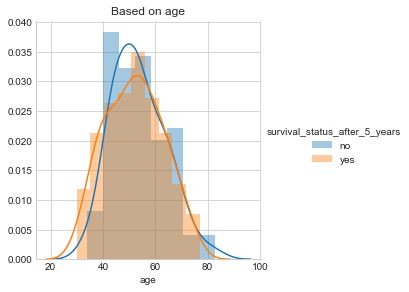

In [46]:
sns.set_style("whitegrid");
sns.FacetGrid(haber,hue="survival_status_after_5_years",size=4)\
    .map(sns.distplot,"age")\
    .add_legend();
plt.title("Based on age")
plt.show()
    

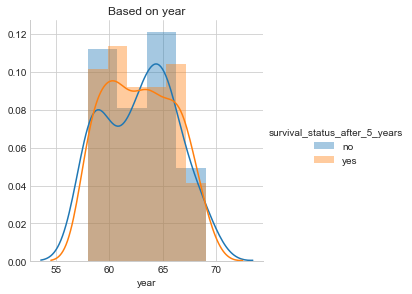

In [47]:
sns.FacetGrid(haber,hue="survival_status_after_5_years",size=4)\
    .map(sns.distplot,"year")\
    .add_legend();
plt.title("Based on year")
plt.show()

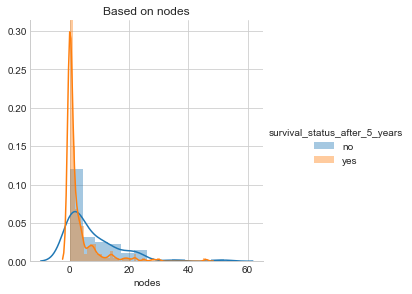

In [48]:
sns.FacetGrid(haber,hue="survival_status_after_5_years",size=4)\
    .map(sns.distplot,"nodes")\
    .add_legend()
plt.title("Based on nodes")
plt.show()

### OBSERVATION:
1.There is a huge overlapping in all three histograms. So, it's very difficult to seperate survival status based on simple if and else conditions.


## PDF AND CDF 

counts are [0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
***********************************************************
bin_edges are [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
***********************************************************


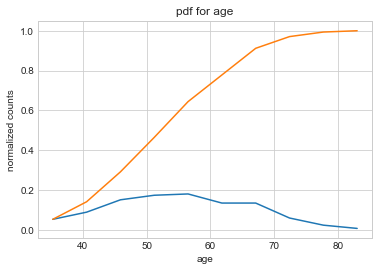

In [49]:
counts,bin_edges = np.histogram(haber["age"],bins=10,density=True)
pdf = counts/counts.sum()
cdf = np.cumsum(pdf)
print("counts are",counts)
print("***********************************************************")
print("bin_edges are",bin_edges)
print("***********************************************************")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel("normalized counts")
plt.xlabel("age")
plt.title("pdf for age")
plt.show()

counts are [0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
******************************************************
bin_edges are [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
******************************************************


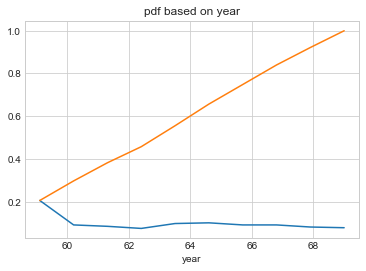

In [50]:
counts,bin_edges = np.histogram(haber["year"],bins=10,density=True)
pdf = counts/counts.sum()
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
print("counts are",counts)
print("******************************************************")
print("bin_edges are",bin_edges)
plt.plot(bin_edges[1:],cdf)
print("******************************************************")
plt.xlabel("year")
plt.title("pdf based on year")
plt.show()

counts are [0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
*************************************************************
bins are [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
*************************************************************


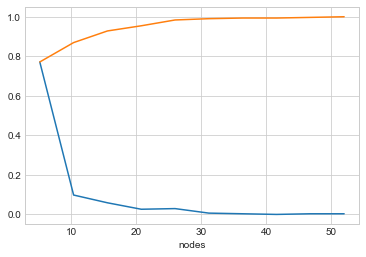

In [51]:
counts,bin_edges = np.histogram(haber["nodes"],bins=10,density=True)
pdf = counts/counts.sum()
cdf = np.cumsum(pdf)
print("counts are",counts)
print("*************************************************************")
print("bins are",bin_edges)
print("*************************************************************")
plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")

plt.show()

### OBSERVATION 
1.The pdf of axil_nodes for patients who survived more than 5 years is more dense near 0.

2.From cdf of nodes, about 80% of people are having nodes less than 5.

3.From cdf of year of treatment, after 1966 there is approx 80% chance that patients will survive.

## BOXPLOT AND WHISPERS

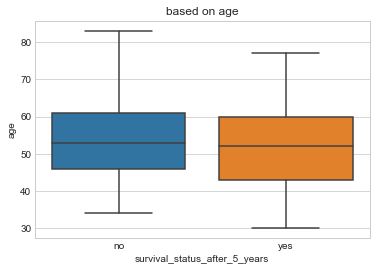

In [52]:
sns.boxplot(x="survival_status_after_5_years",y="age",data=haber)
plt.title("based on age")            
plt.show()

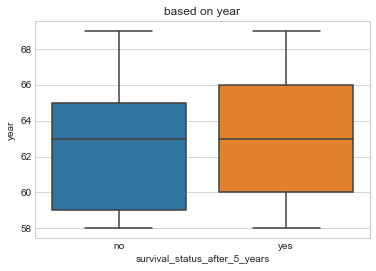

In [53]:
sns.boxplot(x="survival_status_after_5_years",y="year",data=haber)
plt.title("based on year")
plt.show()

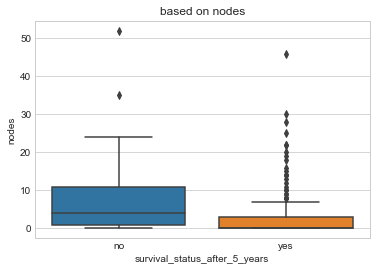

In [54]:
sns.boxplot(x="survival_status_after_5_years",y="nodes",data=haber)
plt.title("based on nodes")
plt.show()

## VIOLIN-PLOT

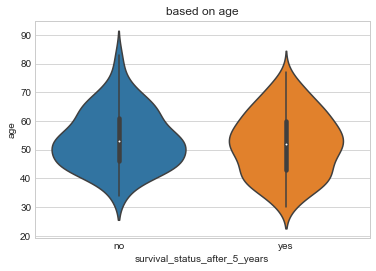

In [55]:
sns.violinplot(x="survival_status_after_5_years",y="age",data=haber)
plt.title("based on age")
plt.show()

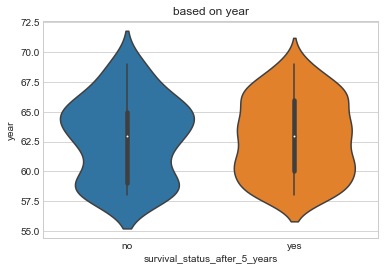

In [56]:
sns.violinplot(x="survival_status_after_5_years",y="year",data=haber)
plt.title("based on year")
plt.show()

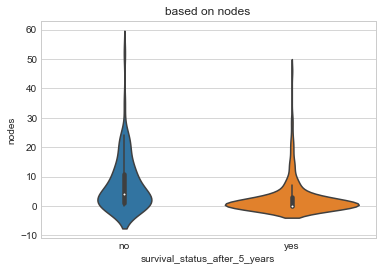

In [57]:
sns.violinplot(x="survival_status_after_5_years",y="nodes",data=haber)
plt.title("based on nodes")
plt.show()

### OBSERVATION:
1.From violin plot of nodes, about 80% of patients  will survive if nodes less than 5 with error less than 20% .

2.We cannot say much on age and years as the error for observing positive survival is quite high in both cases.

# MULTIVARIATE ANALYSIS

## PAIRPLOT 

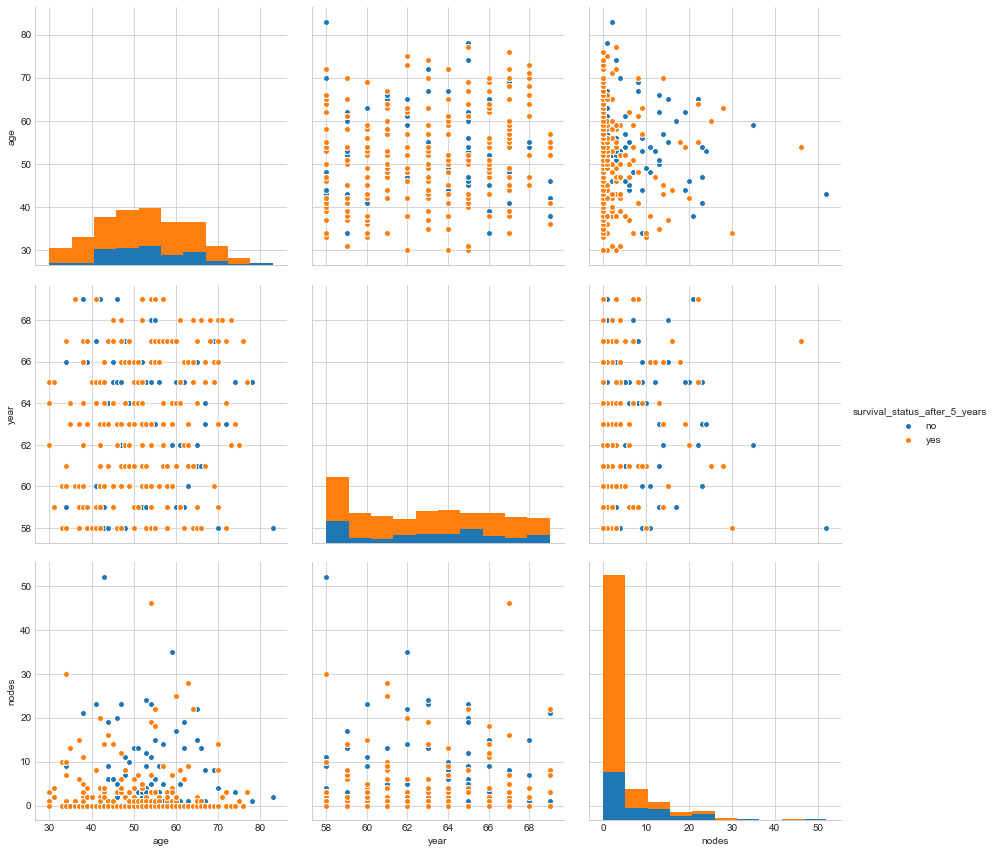

In [58]:
sns.set_style("whitegrid")
sns.pairplot(haber,hue="survival_status_after_5_years",size=4)
plt.show()

### OBSERVATION:
1.Pair plot between nodes and year can be used to seperate survival status but with high error because it's difficult to  observe overlapped patients.  

# CONCLUSION:

1.The most important feature for classification are number of axillary nodes.

2.The patients have higher chance to survive if having nodes less than 5 and year of treatment above 1966.

3.IF we want to choose two major features, that will be year of treatment and nodes, using which we can
seperate survival status.

In [59]:
!jupyter nbconvert --to html haberman_assignment_1.ipynb

[NbConvertApp] Converting notebook haberman_assignment_1.ipynb to html
[NbConvertApp] Writing 625872 bytes to haberman_assignment_1.html
